The use-case is to classify customers based on who is more likely to cancel their booking.

Hyperparameter tuning is performed using GridSearchCV with a specified parameter grid, and the hyperparameters to search over include max_depth, min_samples_split, min_samples_leaf, max_features, ccp_alpha, and class_weight. Data is split using 5-fold cross-validation during the grid search which is done for Decision tree model and as it can be seen the accuracy has been increased from 76% to 79%

"Accuracy" typically refers to the proportion of correctly classified instances in a classification model. It is a common evaluation metric for classification tasks.

An AUC of 1.0 for a Random Forest (RF) model indicates perfect classification on the given dataset. This can be due to several reasons: the model may be overfitting, or the dataset is relatively simple and separable, leading to high AUC.

Regularization methods (e.g., L1, L2 regularization) can help prevent overfitting. The decision to use regularization should depend on the model's performance on unseen data and the specific characteristics of the dataset.

 Since our problem is to perform classification, we believe tree based classification models are the best.

 But, Regularization techniques are not limited to regression problems and can be applied to classification problems as well. In fact, regularization methods are commonly used in classification models to prevent overfitting and improve model generalization. The two most common forms of regularization, L1 and L2 regularization, can be applied to various classification algorithms, including logistic regression, support vector machines, and neural networks.

 As such have performed Logistic regression using L1 and L2  regularization at the end & made comparitive analysis our regular classification models

In [1]:
import numpy as np
import pandas as pd
import matplotlib as plt

import seaborn as sns


df = pd.read_csv("hotel_bookings.csv")


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [3]:
df.shape

(119390, 32)

In [4]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [6]:
df.shape

(119390, 32)

In [7]:
import plotly.express as px
fig = px.histogram(df,x='is_canceled',
                        title='Number of Bookings: (Cancelled-1 & Confirmed-0)',
                        color = 'is_canceled',
                        labels={'is_canceled':'Booking Type'}
                        )
fig.update_layout(barmode='group',height=400,width=600,yaxis_title='Number of Bookings')
fig.update_xaxes(type='category')
fig.show()


In [8]:
country_freq = df['country'].value_counts().to_frame()
country_freq.columns = ['count']
fig = px.choropleth(country_freq, color='count',
                    locations=country_freq.index,
                    hover_name=country_freq.index,
                    color_continuous_scale=px.colors.sequential.Plasma)
fig.update_traces(marker=dict(line=dict(color='#000000', width=1)))
fig.update_layout(title_text='Number of Records by Countries',
                  title_x=0.5, title_font=dict(size=22))  # Location and the font size of the main title
fig.show()

In [9]:
top5_countries = df['country'].value_counts()[0:5]

top5_countries

PRT    48590
GBR    12129
FRA    10415
ESP     8568
DEU     7287
Name: country, dtype: int64

Text(0.5, 1.0, 'Top 5 Countries with highest number of bookings')

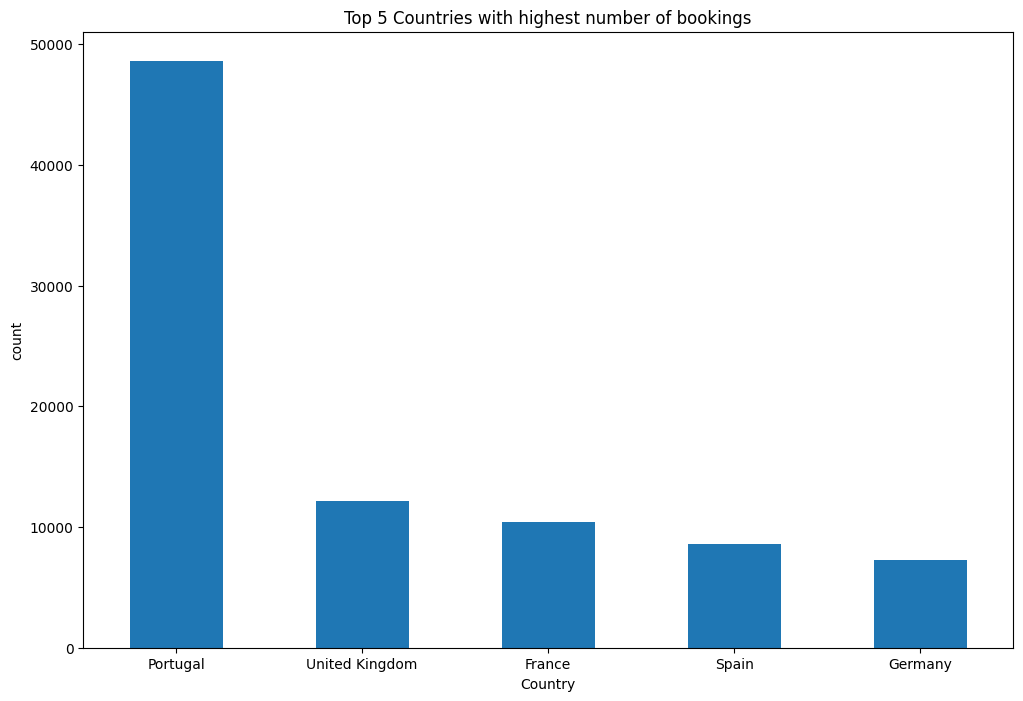

In [12]:
from typing import List
from matplotlib import pyplot as plt
import plotly.express as px
import plotly.graph_objs as go
import datetime
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

ticks=[0,1,2,3,4]
cty=["Portugal","United Kingdom", "France","Spain","Germany"]

plt.figure(figsize=(12,8))
top5_countries.plot.bar()
plt.xlabel("Country")
plt.ylabel("count")
plt.xticks(rotation=360, horizontalalignment="center")
plt.xticks(ticks,cty)
plt.title("Top 5 Countries with highest number of bookings")

In [14]:
df_new = df.copy()
#Calculating total stays
df_new['Total_Stays'] = df_new['stays_in_weekend_nights'] + df_new['stays_in_week_nights']


<ipython-input-14-3811db4a2f83>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



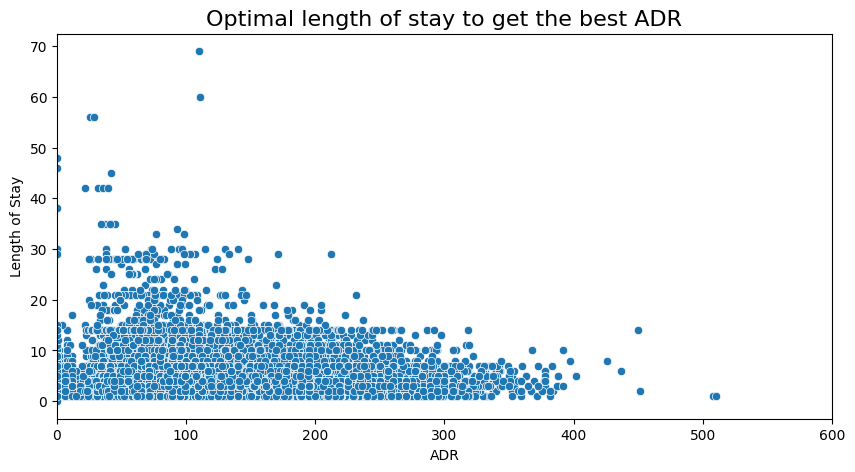

In [15]:
plt.figure(figsize=(10,5))
sns.scatterplot(x=df.adr, y=df_new.Total_Stays)
plt.title("Optimal length of stay to get the best ADR", fontsize=16)
plt.xlabel("ADR",fontsize=10)
plt.ylabel("Length of Stay", fontsize=10)
plt.xlim(0,600)
plt.show()


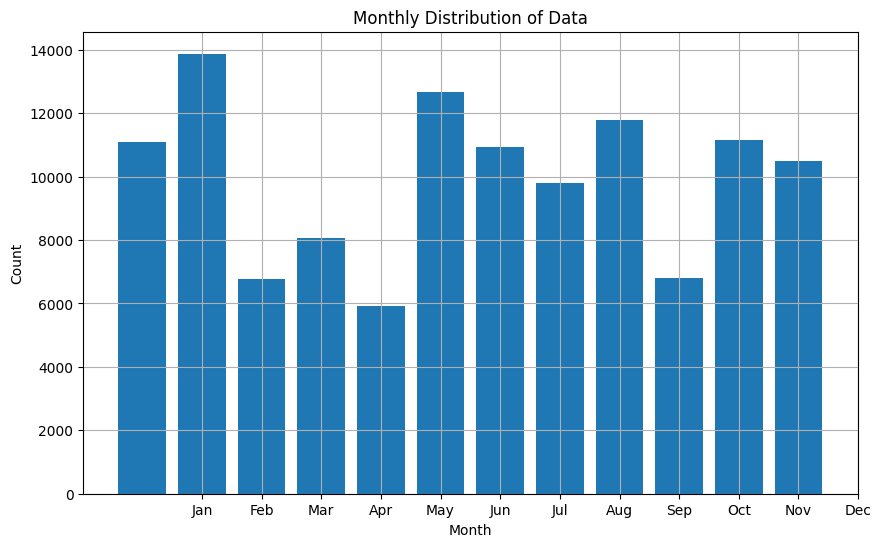

In [16]:
# Group the data by month and count the occurrences
monthly_counts = df['arrival_date_month'].value_counts().sort_index()

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(monthly_counts.index, monthly_counts.values)
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Monthly Distribution of Data')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.show()

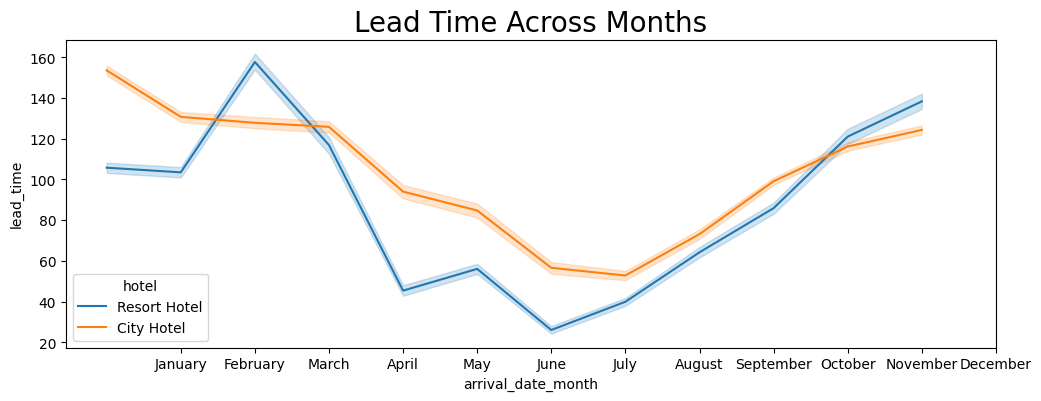

In [17]:

# Next, I visualise the lead time for every month, since, from earlier observations that number of bookings increase during the summer months a similar pattern should be observed here as well.
labels = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
ticks = np.arange(1,13)
plt.figure(figsize=(12,4))
sns.lineplot(data=df, x='arrival_date_month', y='lead_time', hue='hotel')
plt.xticks(ticks=ticks, labels=labels)
plt.title("Lead Time Across Months", fontdict={'fontsize' : 20})
plt.show()

In [18]:

changes_requested = df[["hotel","booking_changes","reservation_status"]]

changes_requested = changes_requested[changes_requested.reservation_status != 0]

changes_requested

,hotel,booking_changes,reservation_status
0,Resort Hotel,3,Check-Out
1,Resort Hotel,4,Check-Out
2,Resort Hotel,0,Check-Out
3,Resort Hotel,0,Check-Out
4,Resort Hotel,0,Check-Out
...,...,...,...
119385,City Hotel,0,Check-Out
119386,City Hotel,0,Check-Out
119387,City Hotel,0,Check-Out
119388,City Hotel,0,Check-Out


<ipython-input-19-37826545c317>:4: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




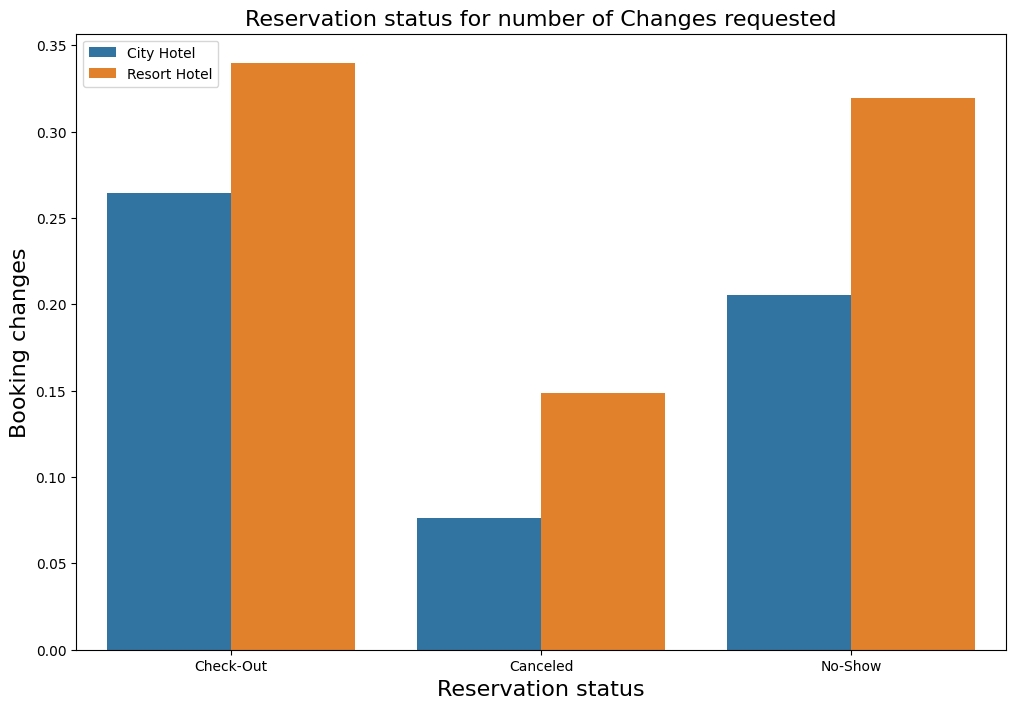

In [19]:
#changes_requested["booking_changes"] = changes_requested["booking_changes"]

plt.figure(figsize=(12, 8))
sns.barplot(x="reservation_status",y="booking_changes" ,
          hue="hotel",hue_order = ["City Hotel", "Resort Hotel"],data=changes_requested, ci=None)
plt.title("Reservation status for number of Changes requested", fontsize=16)
plt.xlabel("Reservation status", fontsize=16)
plt.xticks(rotation=360)
plt.ylabel("Booking changes", fontsize=16)
plt.legend(loc="upper left")
plt.show()


In [20]:
df.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

In [21]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

<ipython-input-22-cf93f6de511b>:5: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



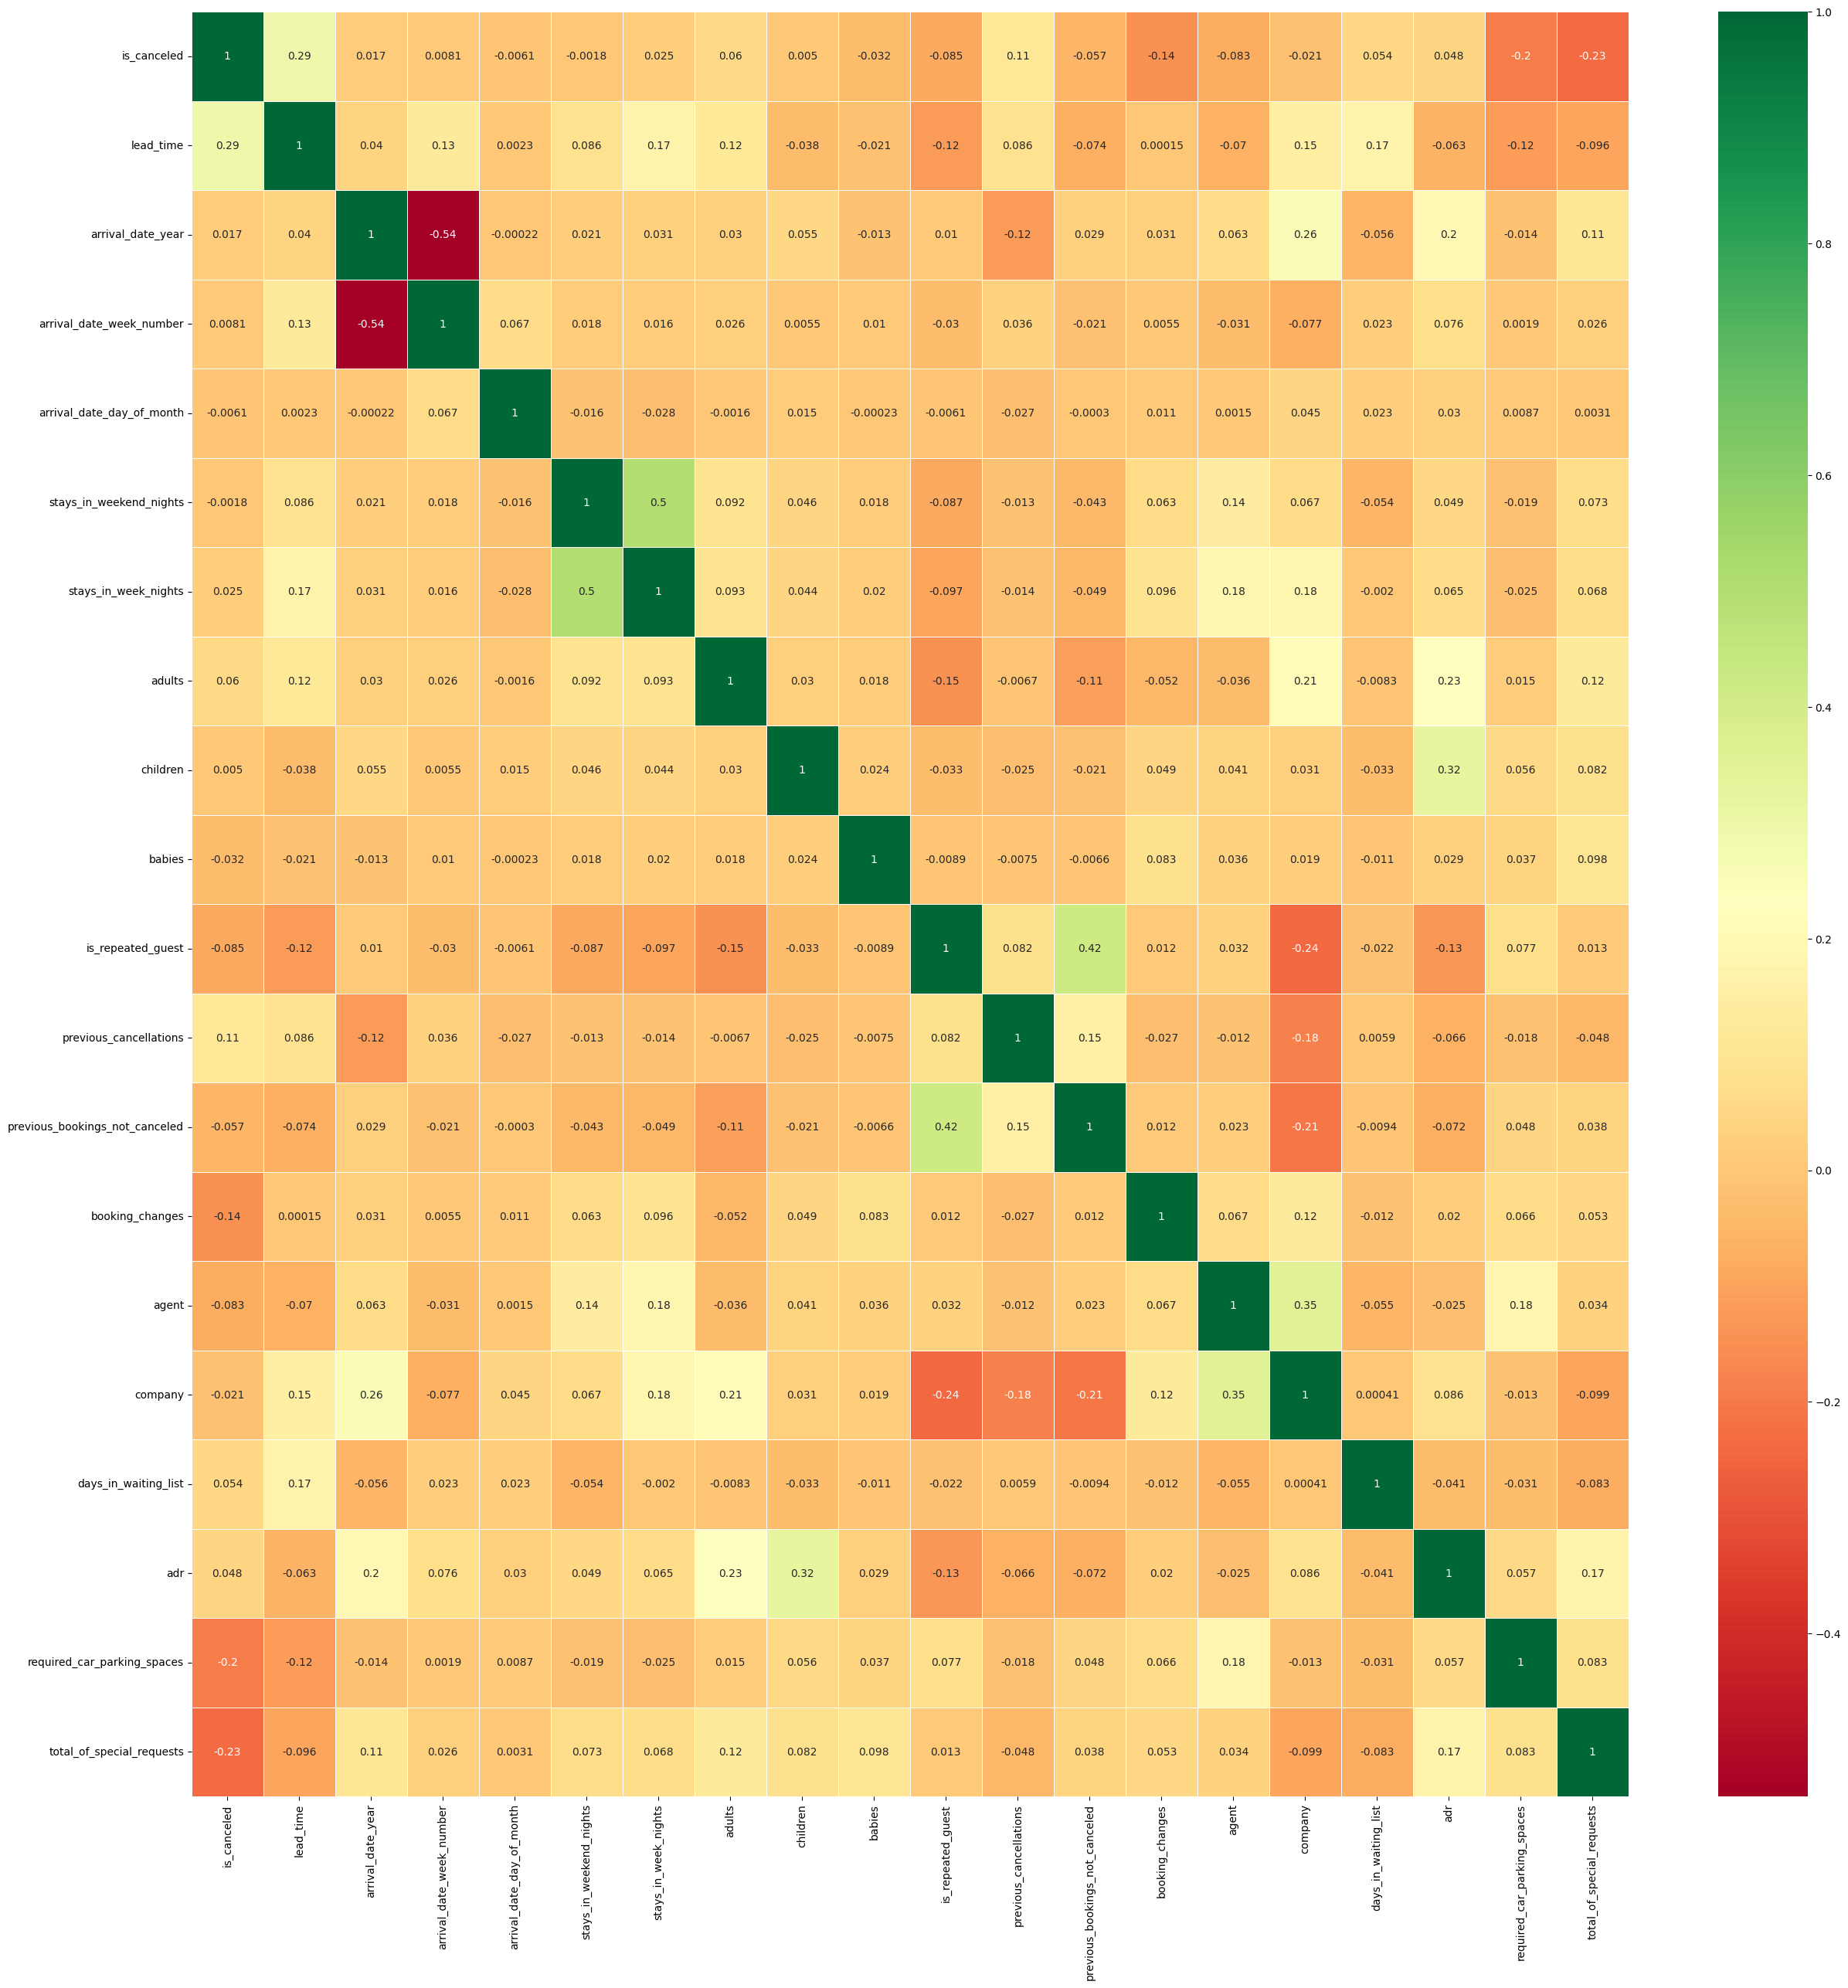

In [22]:
import seaborn as sns
from matplotlib.pyplot import figure

figure(figsize=(30, 30))
ax = sns.heatmap(df.corr(), linewidth=0.5,annot=True, cmap='RdYlGn')



In [23]:
df['country'].dropna(inplace=True)
df['Total Guests'] = df['adults'] + df['children']
df = df[df['Total Guests'] != 0]
df['Total_Stays'] = df['stays_in_weekend_nights'] + df['stays_in_week_nights']

label = ['days_in_waiting_list', 'arrival_date_year', 'arrival_date_year', 'assigned_room_type', 'booking_changes',
               'reservation_status', 'country', 'days_in_waiting_list']
df.drop(labels=label,axis=1,inplace=True)

<ipython-input-23-eb983b0d4443>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-23-eb983b0d4443>:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [24]:
#dealing with missing values

cat_label=['hotel',
 'meal',
 'market_segment',
 'distribution_channel',
 'reserved_room_type',
 'deposit_type',
 'customer_type',
 'reservation_status_date']
cat_df = df[cat_label]
cat_df.head()

,hotel,meal,market_segment,distribution_channel,reserved_room_type,deposit_type,customer_type,reservation_status_date
0,Resort Hotel,BB,Direct,Direct,C,No Deposit,Transient,2015-07-01
1,Resort Hotel,BB,Direct,Direct,C,No Deposit,Transient,2015-07-01
2,Resort Hotel,BB,Direct,Direct,A,No Deposit,Transient,2015-07-02
3,Resort Hotel,BB,Corporate,Corporate,A,No Deposit,Transient,2015-07-02
4,Resort Hotel,BB,Online TA,TA/TO,A,No Deposit,Transient,2015-07-03


In [25]:
cat_df['reservation_status_date'] = pd.to_datetime(cat_df['reservation_status_date'])

cat_df['year'] = cat_df['reservation_status_date'].dt.year
cat_df['month'] = cat_df['reservation_status_date'].dt.month
cat_df['day'] = cat_df['reservation_status_date'].dt.day

<ipython-input-25-59d2b98aa8f0>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-25-59d2b98aa8f0>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-25-59d2b98aa8f0>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-25-59d2b98

In [26]:
cat_df.drop(['reservation_status_date'] , axis = 1, inplace = True)

<ipython-input-26-097e4dc0c908>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [27]:
cat_df['hotel'] = cat_df['hotel'].astype('category').cat.codes

cat_df['meal'] = cat_df['meal'].astype('category').cat.codes

cat_df['market_segment'] = cat_df['market_segment'].astype('category').cat.codes

cat_df['distribution_channel'] = cat_df['distribution_channel'].astype('category').cat.codes

cat_df['reserved_room_type'] = cat_df['reserved_room_type'].astype('category').cat.codes

cat_df['deposit_type'] = cat_df['deposit_type'].astype('category').cat.codes

cat_df['customer_type'] = cat_df['customer_type'].astype('category').cat.codes

cat_df['year'] = cat_df['year'].astype('category').cat.codes


<ipython-input-27-ef9e59ebd905>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-27-ef9e59ebd905>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-27-ef9e59ebd905>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-27-ef9e59e

In [28]:
num_df = df.drop(columns = cat_label, axis = 1)
num_df.drop('is_canceled', axis = 1, inplace = True)

In [29]:
num_df.drop(['Total_Stays','company','Total Guests'],axis=1,inplace=True)

In [30]:
num_df['lead_time'] = np.log(num_df['lead_time'] + 1)
num_df['arrival_date_week_number'] = np.log(num_df['arrival_date_week_number'] + 1)
num_df['arrival_date_day_of_month'] = np.log(num_df['arrival_date_day_of_month'] + 1)
num_df['agent'] = np.log(num_df['agent'] + 1)
num_df['adr'] = np.log(num_df['adr'] + 1)
num_df['arrival_date_month'] = num_df['arrival_date_month'].astype('category').cat.codes

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning:

invalid value encountered in log



In [31]:
#filling missing with mean values
num_df['adr'] = num_df['adr'].fillna(value = num_df['adr'].mean())

In [32]:
X = pd.concat([cat_df, num_df], axis = 1)
y = df['is_canceled']

In [33]:
correlation_matrix = X.corr()

#removing all featrues with more than 0.6 correlation


# Create a mask to identify highly correlated pairs
threshold = 0.6  # Set your correlation threshold
mask = (correlation_matrix.abs() >= threshold) & (correlation_matrix != 1.0)

# Create a list to keep track of variables to remove
variables_to_remove = []

# Iterate through the mask and identify variables to remove
for col in mask.columns:
    correlated_cols = mask.index[mask[col]].tolist()
    if correlated_cols:
        # Select one variable to keep (e.g., the first one)
        keep_variable = correlated_cols[0]
        # Add the rest to the list of variables to remove
        variables_to_remove.extend(correlated_cols[1:])

# Remove the highly correlated variables from the DataFrame
df1 = X.drop(columns=variables_to_remove)

In [34]:
df1.isnull().sum()
#df1 = df1.fillna(0)

hotel                                 0
meal                                  0
market_segment                        0
distribution_channel                  0
reserved_room_type                    0
deposit_type                          0
customer_type                         0
year                                  0
month                                 0
day                                   0
lead_time                             0
arrival_date_month                    0
arrival_date_week_number              0
arrival_date_day_of_month             0
stays_in_weekend_nights               0
stays_in_week_nights                  0
adults                                0
children                              4
babies                                0
is_repeated_guest                     0
previous_cancellations                0
previous_bookings_not_canceled        0
agent                             16280
adr                                   0
required_car_parking_spaces           0


In [35]:
df1 = df1.fillna(df1.mean())



In [36]:
#Decision tree model
#L1 (Lasso) and L2 (Ridge) regularization are not typically used directly with decision trees because decision trees are inherently different from linear models,
# and regularization techniques designed for linear models don't directly apply.
#Decision trees grow by recursively splitting nodes based on feature values, rather than learning coefficients like linear models.

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X = df1.copy()


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a decision tree classifier with regularization parameters
# Adjust these parameters to control overfitting
clf = DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, min_samples_split=10, max_leaf_nodes=None)

# Train the classifier on the training data
clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.77


In [37]:

from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# Evaluate the Decision Tree classifier
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{class_report}')

Accuracy: 0.7650784330173643
Confusion Matrix:
[[14925    33]
 [ 5568  3316]]
Classification Report:
              precision    recall  f1-score   support

           0       0.73      1.00      0.84     14958
           1       0.99      0.37      0.54      8884

    accuracy                           0.77     23842
   macro avg       0.86      0.69      0.69     23842
weighted avg       0.83      0.77      0.73     23842



In [38]:
from sklearn.model_selection import GridSearchCV
# Define the hyperparameters to search over decision tree
param_grid = {
    'max_depth': [5, 10, 20, 30],
    'min_samples_split': [1, 2, 5],
    'min_samples_leaf': [2, 4],
    'max_features': ['sqrt', 'log2', None],
    'ccp_alpha': [1.0, 0.1, 0.05, 0.01, 0.005],
    'class_weight': ['balanced']
}


# Create the GridSearchCV object with cross-validation (e.g., 5-fold cross-validation)
grid_search = GridSearchCV(estimator=clf,  param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print(best_params)



/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning:


600 fits failed out of a total of 1800.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
600 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py", line 889, in fit
    super().fit(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py", line 177, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _va

{'ccp_alpha': 0.01, 'class_weight': 'balanced', 'max_depth': 5, 'max_features': None, 'min_samples_leaf': 2, 'min_samples_split': 2}


In [39]:
# Create DTrees model with the best hyperparameters
clf2 = DecisionTreeClassifier(random_state=42, **best_params)

# Train the best model on the entire training dataset
clf2.fit(X_train, y_train)

# Make predictions on the test data
y_pred_best = clf2.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_best)
print(f'Best Model Accuracy: {accuracy}')


# Evaluate the Decision Tree classifier
conf_matrix = confusion_matrix(y_test, y_pred_best)
class_report = classification_report(y_test, y_pred_best)

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{class_report}')

Best Model Accuracy: 0.7966194111232279
Accuracy: 0.7966194111232279
Confusion Matrix:
[[13678  1280]
 [ 3569  5315]]
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.91      0.85     14958
           1       0.81      0.60      0.69      8884

    accuracy                           0.80     23842
   macro avg       0.80      0.76      0.77     23842
weighted avg       0.80      0.80      0.79     23842



In [40]:
#K-Neighbour
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)

acc_knn = accuracy_score(y_test, y_pred_knn)
conf = confusion_matrix(y_test, y_pred_knn)
clf_report = classification_report(y_test, y_pred_knn)

print(f"Accuracy Score of KNN is : {acc_knn}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

Accuracy Score of KNN is : 0.9086905460951262
Confusion Matrix : 
[[14689   269]
 [ 1908  6976]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.89      0.98      0.93     14958
           1       0.96      0.79      0.87      8884

    accuracy                           0.91     23842
   macro avg       0.92      0.88      0.90     23842
weighted avg       0.91      0.91      0.91     23842



In [41]:
#Random Forest classifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
rfc=RandomForestClassifier()
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [42]:
y_pred=rfc.predict(X_test)
conf =print(confusion_matrix(y_test, y_pred))
rf_report =print(classification_report(y_test, y_pred))
score=accuracy_score(y_test,y_pred)
score

[[14871    87]
 [  853  8031]]
              precision    recall  f1-score   support

           0       0.95      0.99      0.97     14958
           1       0.99      0.90      0.94      8884

    accuracy                           0.96     23842
   macro avg       0.97      0.95      0.96     23842
weighted avg       0.96      0.96      0.96     23842



0.9605737773676705

In [ ]:
#we already have good scores, so using RandomizedSearchCV instead of GridsearchCV for faster tuning

# from sklearn.model_selection import RandomizedSearchCV


# param_dist = {
#     'n_estimators': np.arange(10, 201, 10),  # Vary the number of trees from 10 to 200
#     'max_depth': [None] + list(np.arange(10, 110, 10)),
#     'min_samples_split': np.arange(2, 11),
#     'min_samples_leaf': np.arange(1, 11)
# }

# # Create a RandomizedSearchCV object with GPU support
# random_search = RandomizedSearchCV(
#     estimator=rfc,
#     param_distributions=param_dist,
#     n_iter=100,
#     cv=5,
#     scoring='accuracy',
#     random_state=42,
#     n_jobs=-1,  # Use all available CPU cores
# )

# # Fit the RandomizedSearchCV object to the data
# random_search.fit(X_train, y_train)

# best_params = random_search.best_params_
# best_score = random_search.best_score_

# print("Best Hyperparameters:", best_params)
# print("Best Accuracy Score:", best_score)

In [ ]:
#RF using best parameters



# # Create a model with the best hyperparameters
# rfc2 = RandomForestClassifier(random_state=42, **best_params)

# # Train the best model on the entire training dataset
# rfc2.fit(X_train, y_train)

# # Make predictions on the test data
# y_pred_best = rfc2.predict(X_test)

# # Evaluate the model
# accuracy = accuracy_score(y_test, y_pred_best)
# print(f'Best Model Accuracy: {accuracy}')


# # Evaluate the Decision Tree classifier
# conf_matrix = confusion_matrix(y_test, y_pred_best)
# class_report = classification_report(y_test, y_pred_best)

# print(f'Accuracy: {accuracy}')
# print(f'Confusion Matrix:\n{conf_matrix}')
# print(f'Classification Report:\n{class_report}')

In [48]:
#Since RF has already a very high scores, we are not tuning that model
#Gradient Boosting

from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier()
gbc.fit(X_train,y_train)

y_pred=gbc.predict(X_test)
conf =print(confusion_matrix(y_test, y_pred))
clf =print(classification_report(y_test, y_pred))
score=accuracy_score(y_test,y_pred)
score



[[22205   256]
 [ 3147 10155]]
              precision    recall  f1-score   support

           0       0.88      0.99      0.93     22461
           1       0.98      0.76      0.86     13302

    accuracy                           0.90     35763
   macro avg       0.93      0.88      0.89     35763
weighted avg       0.91      0.90      0.90     35763



0.9048457903419735

In [ ]:
#GB using best parameters

# # Define the hyperparameters to search over
# param_grid = {
#     'max_depth': [None, 10, 20, 30],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4]
# }

# # Create the GridSearchCV object with cross-validation (e.g., 5-fold cross-validation)
# grid_search = GridSearchCV(estimator=gbc,  param_grid=param_grid, cv=5, scoring='accuracy')#, n_jobs=-1)

# # Fit the GridSearchCV object to the training data
# grid_search.fit(X_train, y_train)

# # Get the best hyperparameters
# best_params = grid_search.best_params_

# # Create a model with the best hyperparameters
# gbc2 = GradientBoostingClassifier(random_state=42, **best_params)

# # Train the best model on the entire training dataset
# gbc2.fit(X_train, y_train)

# # Make predictions on the test data
# y_pred_best = gbc2.predict(X_test)

# # Evaluate the model
# accuracy = accuracy_score(y_test, y_pred_best)
# print(f'Best Model Accuracy: {accuracy}')

In [49]:
#XGBoost Classifier

from xgboost import XGBClassifier

xgb =XGBClassifier(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)

xgb.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning:

[22:58:48] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.



XGBClassifier(alpha=10, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.3, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=10, n_jobs=None,
              num_parallel_tree=None, ...)

In [50]:
y_pred=xgb.predict(X_test)
conf =print(confusion_matrix(y_test, y_pred))
clf =print(classification_report(y_test, y_pred))
score=accuracy_score(y_test,y_pred)
score

[[22443    18]
 [ 8696  4606]]
              precision    recall  f1-score   support

           0       0.72      1.00      0.84     22461
           1       1.00      0.35      0.51     13302

    accuracy                           0.76     35763
   macro avg       0.86      0.67      0.68     35763
weighted avg       0.82      0.76      0.72     35763



0.7563403517601991

ROC AUC Scores:
Decision Tree: 0.82
Random Forest: 1.00
Gradient Boosting: 0.95
KNN: 0.96
XGBoost: 0.88

PR AUC Scores:
Decision Tree: 0.75
Random Forest: 0.99
Gradient Boosting: 0.94
KNN: 0.94
XGBoost: 0.86


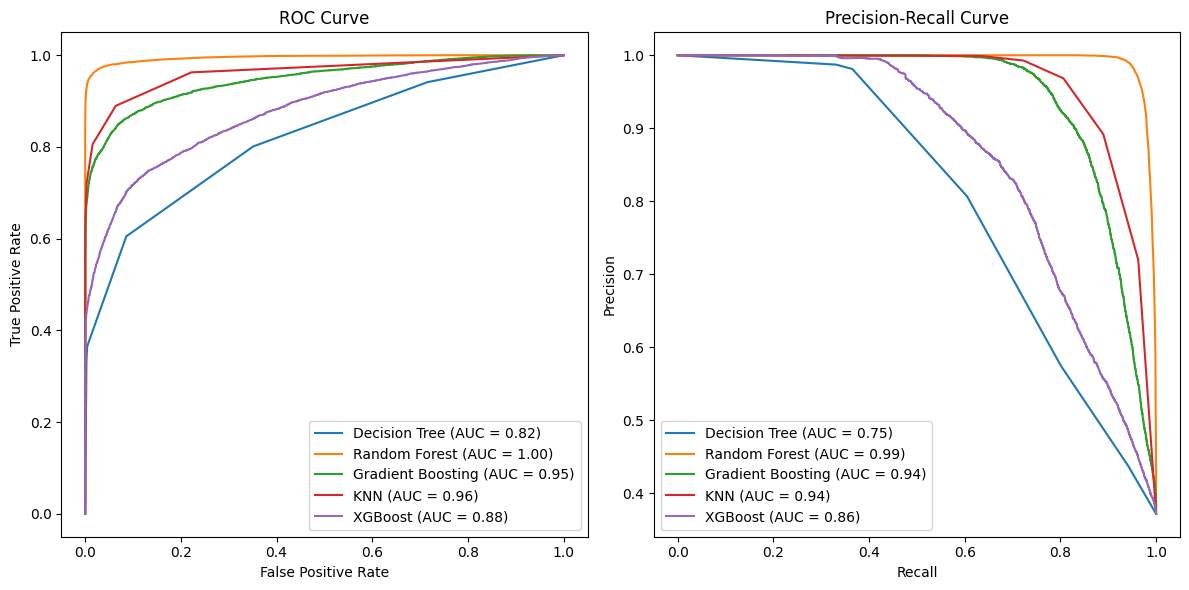

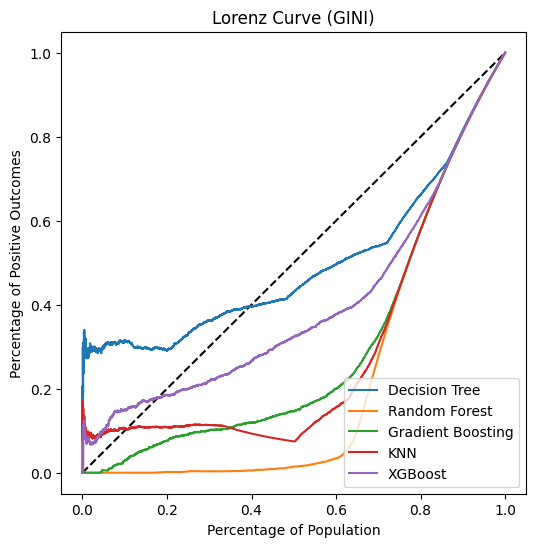

In [46]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score, auc, precision_recall_curve, average_precision_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

# Generate some sample data or load your dataset
# X, y = load_your_data()  # Replace with your dataset

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the models
models = {
    'Decision Tree': clf2,
    'Random Forest': rfc,
    'Gradient Boosting': gbc,
    'KNN': knn,
    'XGBoost': xgb,
}

# Create empty dictionaries to store results
roc_auc_scores = {}
pr_auc_scores = {}

# Plot ROC and PR curves for each model
plt.figure(figsize=(12, 6))

for name, model in models.items():
    y_pred = model.predict_proba(X_test)[:, 1]

    fpr, tpr, _ = roc_curve(y_test, y_pred)
    precision, recall, _ = precision_recall_curve(y_test, y_pred)

    roc_auc = auc(fpr, tpr)
    pr_auc = average_precision_score(y_test, y_pred)

    roc_auc_scores[name] = roc_auc
    pr_auc_scores[name] = pr_auc

    plt.subplot(1, 2, 1)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc='lower right')

    plt.subplot(1, 2, 2)
    plt.plot(recall, precision, label=f'{name} (AUC = {pr_auc:.2f})')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend(loc='lower left')

plt.tight_layout()

# Plot Lorenz curves (GINI)
plt.figure(figsize=(6, 6))
plt.plot([0, 1], [0, 1], 'k--')
for name, model in models.items():
    sorted_y = np.array(sorted(zip(y_test, model.predict_proba(X_test)[:, 1]), key=lambda x: x[1]))
    cum_gains = np.cumsum(sorted_y[:, 0]) / sum(y_test)
    lorenz_curve = cum_gains / np.linspace(1/len(y_test), 1, len(y_test))
    plt.plot(np.linspace(0, 1, len(y_test)), lorenz_curve, label=name)
plt.xlabel('Percentage of Population')
plt.ylabel('Percentage of Positive Outcomes')
plt.title('Lorenz Curve (GINI)')
plt.legend(loc='lower right')

# Display AUC scores for each model
print("ROC AUC Scores:")
for name, auc_score in roc_auc_scores.items():
    print(f"{name}: {auc_score:.2f}")

print("\nPR AUC Scores:")
for name, auc_score in pr_auc_scores.items():
    print(f"{name}: {auc_score:.2f}")

plt.show()

In [52]:
from sklearn.linear_model import LogisticRegression
# Create and train a Logistic Regression model with L1 regularization
logistic_reg_l1 = LogisticRegression(penalty='l1', C=1.0, solver='liblinear')  # Use the 'liblinear' solver for L1
logistic_reg_l1.fit(X_train, y_train)

# Create and train a Logistic Regression model with L2 regularization
logistic_reg_l2 = LogisticRegression(penalty='l2', C=1.0, solver='lbfgs')  # Use the 'lbfgs' solver for L2
logistic_reg_l2.fit(X_train, y_train)

# Make predictions
predictions_l1 = logistic_reg_l1.predict(X_test)
predictions_l2 = logistic_reg_l2.predict(X_test)

# Evaluate the models (e.g., accuracy, precision, recall, F1-score)
from sklearn.metrics import accuracy_score

accuracy_l1 = accuracy_score(y_test, predictions_l1)
accuracy_l2 = accuracy_score(y_test, predictions_l2)

print(f"Accuracy (L1 Regularization): {accuracy_l1}")
print(f"Accuracy (L2 Regularization): {accuracy_l2}")


Accuracy (L1 Regularization): 0.8123199955261023
Accuracy (L2 Regularization): 0.806168386321058


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



Precision recall and ROC curve for Logistic Regression models for L1(Lasso) & L2(Ridge) regularizations

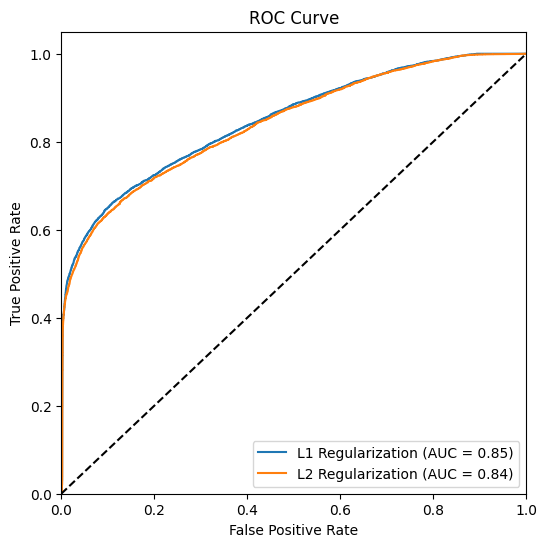

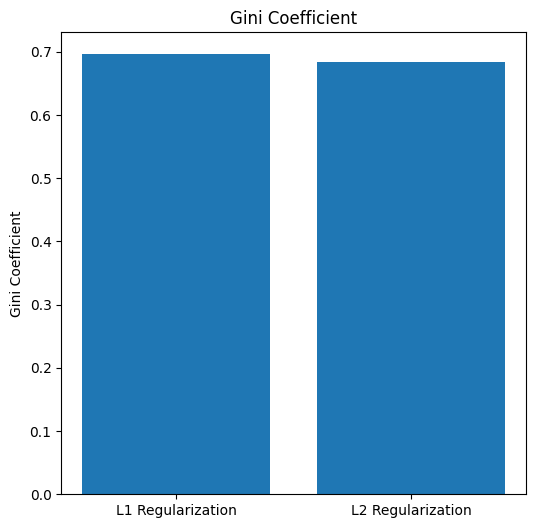

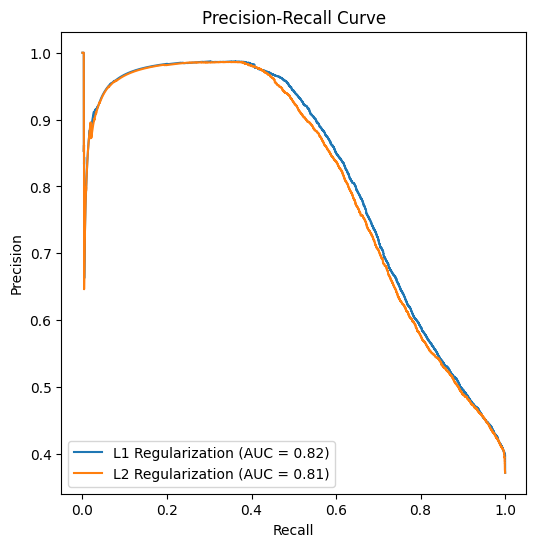

In [55]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score, auc, precision_recall_curve, average_precision_score

# Predict probabilities for each model
probs_l1 = logistic_reg_l1.predict_proba(X_test)[:, 1]
probs_l2 = logistic_reg_l2.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr_l1, tpr_l1, _ = roc_curve(y_test, probs_l1)
roc_auc_l1 = auc(fpr_l1, tpr_l1)

fpr_l2, tpr_l2, _ = roc_curve(y_test, probs_l2)
roc_auc_l2 = auc(fpr_l2, tpr_l2)

# Compute Gini coefficient (2 * AUC - 1)
gini_l1 = 2 * roc_auc_l1 - 1
gini_l2 = 2 * roc_auc_l2 - 1

# Compute Precision-Recall curve and AUC
precision_l1, recall_l1, _ = precision_recall_curve(y_test, probs_l1)
pr_auc_l1 = average_precision_score(y_test, probs_l1)

precision_l2, recall_l2, _ = precision_recall_curve(y_test, probs_l2)
pr_auc_l2 = average_precision_score(y_test, probs_l2)

# Plot ROC curve
plt.figure(figsize=(6, 6))
plt.plot(fpr_l1, tpr_l1, label=f'L1 Regularization (AUC = {roc_auc_l1:.2f})')
plt.plot(fpr_l2, tpr_l2, label=f'L2 Regularization (AUC = {roc_auc_l2:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

# Plot Gini coefficient
plt.figure(figsize=(6, 6))
plt.bar(['L1 Regularization', 'L2 Regularization'], [gini_l1, gini_l2])
plt.ylabel('Gini Coefficient')
plt.title('Gini Coefficient')
plt.show()

# Plot Precision-Recall curve
plt.figure(figsize=(6, 6))
plt.plot(recall_l1, precision_l1, label=f'L1 Regularization (AUC = {pr_auc_l1:.2f})')
plt.plot(recall_l2, precision_l2, label=f'L2 Regularization (AUC = {pr_auc_l2:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()